# Example 3: Mall Customers Dataset Clustering Using K-Means

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from kmeans import KMeans
from utils import plot_error

## Prepare The Dataset

In [13]:
df = pd.read_csv("./sample_data/Mall_Customers.csv")
df = df.drop(columns="CustomerID")
df = df.replace({"Gender": {"Male": 0, "Female": 1}})

data = df.to_numpy()

In [14]:
df.sample(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
3,1,23,16,77
125,1,31,70,77
155,1,27,78,89


## Find The Best Number of Clusters

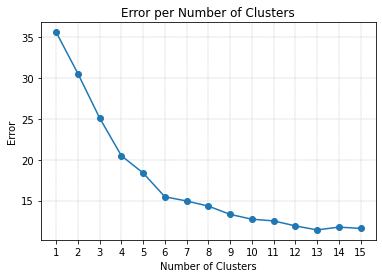

In [24]:
plot_error(data, list(range(1, 16)))

In [25]:
n_clusters = 6

## Fit The Model

In [26]:
km = KMeans(n_clusters)
centers, labels = km.fit(data)

## Visualize The Clustered Dataset

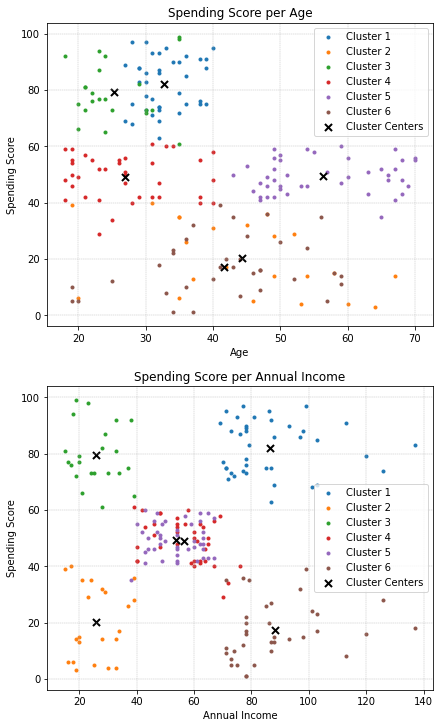

In [27]:
fig, axs = plt.subplots(2, 1, constrained_layout=True, figsize=(6, 10))

for i in np.unique(labels):
    axs[0].scatter(data[labels == i , 1] , data[labels == i , 3], label=i, marker='.')
axs[0].scatter(centers[:, 1], centers[:, 3], marker='x', color='black', s=50, linewidth=2)
axs[0].legend(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster Centers'])
axs[0].grid(linestyle='--', linewidth=0.4)
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Spending Score")
axs[0].set_title("Spending Score per Age")

for i in np.unique(labels):
    axs[1].scatter(data[labels == i , 2] , data[labels == i , 3], label=i, marker='.')
axs[1].scatter(centers[:, 2], centers[:, 3], marker='x', color='black', s=50, linewidth=2)
axs[1].legend(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster Centers'])
axs[1].grid(linestyle='--', linewidth=0.4)
axs[1].set_xlabel("Annual Income")
axs[1].set_ylabel("Spending Score")
axs[1].set_title("Spending Score per Annual Income")

plt.show()